# Project find defaulter using Machine learning algorithm

The Project is to find credit defaulter.The dataset used is from Kaggle called credit_card_defaulter this dataset contains total of 25 variables with 30000 records. Here the target variable is cataforical.


The goal behind using this model is to achieve two things:-
Bring more consistency to the loaning process and
Investigate what the key drivers are behind a potential defaulter.


First lets import all the nessasary libraries used in data cleaning, visualising .

In [1]:
#libraries for data preprocessing
import pandas as pd
import numpy as np
#libraries for Visualization
import matplotlib.pyplot as plt
import seaborn as sns



Loading  data from .CSV format to DataFrame,a feature of pandas library that reads data and displays in rows and column with index like excel you can perform filtering, sorting etc

In [2]:
df = pd.read_csv('Credit card.csv')

In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


Checking variable names,number of records, datatype and null or not-null.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_AMT4                     30000 non-null float64
BILL_AMT5                     30000 non-null float64
BILL_AMT6   

In [5]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

So above you can see that there are no null values in data set.

Lets gain some more knowledge about the data like mean, standard deviation.

In [6]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


# Renaming and deleting some rows

So from above set of variables lets drop a column called ID as it is of no use in building model.

In [7]:
df=df.drop(['ID'],axis=1)

In [8]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


Further for convenience lets rename some columns.

In [9]:
df.columns.tolist()

['LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default.payment.next.month']

In [10]:
df=df.rename(columns={'PAY_0':'PAY_1','default.payment.next.month':'default'})

In [11]:
df.columns.tolist()

['LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default']

# Knowing features.

Following i will brief about  features as i felt that briefing post variable naming will be better in understanding.

There are 24 variables in Dataframe:


<br>LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
<br>SEX: Gender (1=male, 2=female)
<br>EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
<br>MARRIAGE: Marital status (1=married, 2=single, 3=others)
<br>AGE: Age in years
<br>PAY_1: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... <br>8=payment delay for eight months, 9=payment delay for nine months and above)
<br>PAY_2: Repayment status in August, 2005 (scale same as above)
<br>PAY_3: Repayment status in July, 2005 (scale same as above)
<br>PAY_4: Repayment status in June, 2005 (scale same as above)
<br>PAY_5: Repayment status in May, 2005 (scale same as above)
<br>PAY_6: Repayment status in April, 2005 (scale same as above)
<br>BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
<br>BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
<br>BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
<br>BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
<br>BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
<br>BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
<br>PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
<br>PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
<br>PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
<br>PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
<br>PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
<br>PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
<br>default: Default payment (1=yes, 0=no)

# Lets visualise some categorical features and see their frequency.

There are 4 categorical features:-
<br>Sex
<br>Education
<br>Marriage
<br>Default

In [12]:
df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

So in sex feature 1 indicates Male and 2 indicates Female,Lets plot.
<br>So we can conclude that there are more number of Female credit card users than Male.

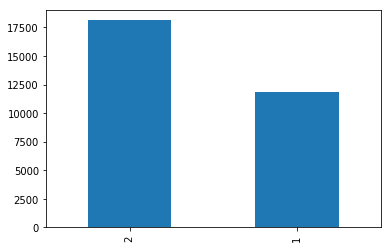

In [13]:
df.SEX.value_counts().plot(kind='bar')

In [14]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

EDUCATION:1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown

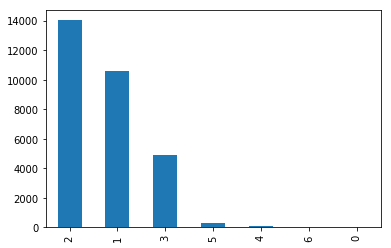

In [15]:
df['EDUCATION'].value_counts().plot(kind='bar')

Number of credit cars holders who went to university are more compared to others.

In [16]:
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

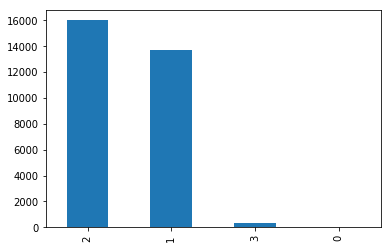

In [17]:
df['MARRIAGE'].value_counts().plot(kind='bar')

As 1 indicates married and 2 indicates single and 3 others therefore we can conclude that there are Non married holders more than married.


In [18]:
df['default'].value_counts()

0    23364
1     6636
Name: default, dtype: int64

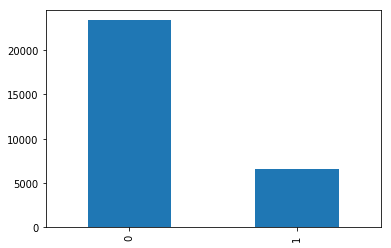

In [19]:
df.default.value_counts().plot(kind='bar')

So as the default value 1 indicates Default and 0 indicates no default there are  less defaulters

# DATA CLEANING 

As there are some values in features are that are unknown filtering them by data cleaning by checking each variable.

In [20]:
df.PAY_1.unique()

array([ 2, -1,  0, -2,  1,  3,  4,  8,  7,  5,  6], dtype=int64)

In [21]:
df.PAY_2.unique()

array([ 2,  0, -1, -2,  3,  5,  7,  4,  1,  6,  8], dtype=int64)

In [22]:
df.PAY_3.unique()

array([-1,  0,  2, -2,  3,  4,  6,  7,  1,  5,  8], dtype=int64)

In [23]:
df.PAY_4.unique()

array([-1,  0, -2,  2,  3,  4,  5,  7,  6,  1,  8], dtype=int64)

In [24]:
df.PAY_5.unique()


array([-2,  0, -1,  2,  3,  5,  4,  7,  8,  6], dtype=int64)

In [25]:
df.PAY_6.unique()

array([-2,  2,  0, -1,  3,  6,  4,  7,  8,  5], dtype=int64)

Above are unique values of PAY feature which is basically repayment status from month September to April.
<br>PAY_1: Repayment status in September, 2005 (-2: No consumption; -1: Paid in full; 0: The use of revolving credit;-1=pay <br>duly, 1=payment delay for one month, 2=payment delay for two months, ... <br>8=payment delay for eight months, 9=payment <br>delay for nine months and above)
<br>PAY_2: Repayment status in August, 2005 (scale same as above)
<br>PAY_3: Repayment status in July, 2005 (scale same as above)
<br>PAY_4: Repayment status in June, 2005 (scale same as above)
<br>PAY_5: Repayment status in May, 2005 (scale same as above)
<br>PAY_6: Repayment status in April, 2005 (scale same as above)

In [26]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')

In [27]:
op=(df.MARRIAGE==0) 
df.loc[op,'MARRIAGE']=3


In [28]:
df.MARRIAGE.unique()

array([1, 2, 3], dtype=int64)

In [29]:
df.EDUCATION.unique()

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

since 0,5,6 are basically unknown

In [30]:
irt = (df.EDUCATION==0) | (df.EDUCATION==6)
df.loc[irt,'EDUCATION']=5

In [31]:
df.EDUCATION.unique()

array([2, 1, 3, 5, 4], dtype=int64)

So i reduced redundant values 0 and 6 unknown values with 5.

# EXPLORATORY  DATA  ANALYSIS.

Exploratory data analysis with visualisation and understanding correlations between different variables. 

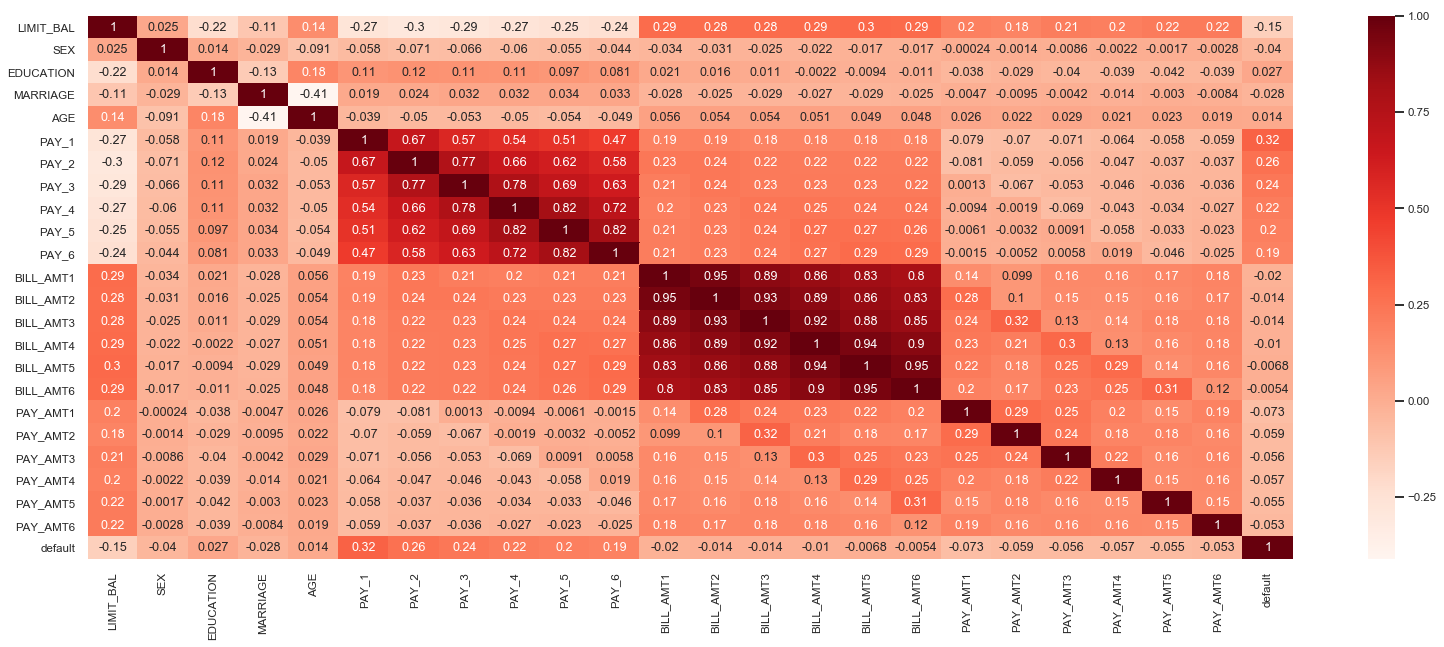

In [32]:
sns.set(rc={'figure.figsize':(27,10)})
sns.set_context("talk",font_scale=0.7)
sns.heatmap(df.iloc[:,0:].corr(),cmap='Reds',annot=True);

If you see the above heatmap you can see correlation between variables, those that caught my eye are:
<br> The lowest correlation is between limit balance(-0.15) and default, that does mean that lower credit limit higher <br>default chances.
<br>The highest correlation with respect to default is with Payment status(0.32)
<br>Positive correlation tells that longer period of delay more chances of default.

<br> client's  payment behaviour gives strong indication on default or not.

In [33]:
df.MARRIAGE.unique()

array([1, 2, 3], dtype=int64)

In [34]:
df.MARRIAGE.value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

Explore EDUCATION VS default.

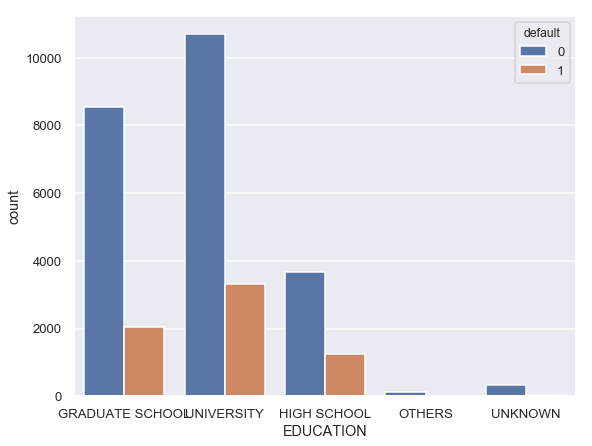

In [35]:
sns.set(rc={'figure.figsize':(9,7)})
sns.set_context("talk",font_scale=0.8)

edu=sns.countplot(x='EDUCATION',hue='default',data=df)
edu.set_xticklabels(['GRADUATE SCHOOL','UNIVERSITY','HIGH SCHOOL','OTHERS','UNKNOWN'])
plt.show()

In [36]:
default0=df.groupby(df['EDUCATION'][df['default']==0]).size().reset_index(name='No default')
default1=df.groupby(df['EDUCATION'][df['default']==1]).size().reset_index(name='default')
total=df.groupby('EDUCATION').size().reset_index(name='Total')

edu_table= default0.join(default1['default']).join(total['Total'])
edu_table['EDUCATION']=['Graduate school','University','High school','Others','Unknown']
edu_table

,EDUCATION,No default,default,Total
0,Graduate school,8549,2036,10585
1,University,10700,3330,14030
2,High school,3680,1237,4917
3,Others,116,7,123
4,Unknown,319,26,345


Turning default count into percentage.

In [37]:
edu_table['No default']= round((default0['No default']/total['Total'])*100,2)
edu_table['default']= round((default1['default']/total['Total'])*100,2)
edu_pct=edu_table.iloc[:,0:3]
edu_pct= edu_pct.rename(columns={'No default':'no default(%)','default':'default(%)'})
edu_pct


,EDUCATION,no default(%),default(%)
0,Graduate school,80.77,19.23
1,University,76.27,23.73
2,High school,74.84,25.16
3,Others,94.31,5.69
4,Unknown,92.46,7.54


Summary (Education Level vs. Default)
<br>Although the Default Count for High School is lower than Graduate School & University. But in terms of Default Percentage, <br>those with High School level have higher chance of Default.

Explore Marriage vs. Default (with same method).

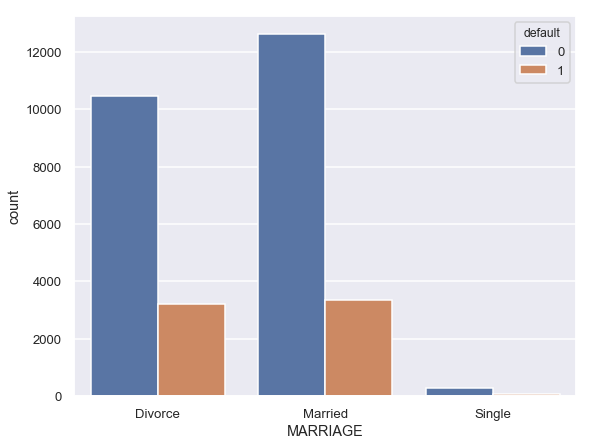

In [38]:
sns.set(rc={'figure.figsize':(9,7)})
sns.set_context('talk',font_scale=0.8)

marri=sns.countplot(x='MARRIAGE',hue='default',data=df)
marri.set_xticklabels(['Divorce','Married','Single','Others'])
plt.show()

In [39]:
default0 = df.groupby(df['MARRIAGE'][df['default'] == 0]).size().reset_index(name='NOT_DEFAULT')
default1 = df.groupby(df['MARRIAGE'][df['default'] == 1]).size().reset_index(name='DEFAULT')
total = df.groupby('MARRIAGE').size().reset_index(name='TOTAL')

marriTable = default0.join(default1['DEFAULT']).join(total['TOTAL'])
marriTable['MARRIAGE'] = ['Married','Single','Others']

marriTable

,MARRIAGE,NOT_DEFAULT,DEFAULT,TOTAL
0,Married,10453,3206,13659
1,Single,12623,3341,15964
2,Others,288,89,377


In [40]:
marriTable['NOT_DEFAULT'] = round((default0['NOT_DEFAULT']/total['TOTAL'])*100,2)
marriTable['DEFAULT'] = round((default1['DEFAULT']/total['TOTAL'])*100,2)

marriPct = marriTable.iloc[:,0:3]
marriPct = marriPct.rename(columns={'NOT_DEFAULT': 'NOT_DEFAULT(%)', 'DEFAULT': 'DEFAULT(%)'})

marriPct

,MARRIAGE,NOT_DEFAULT(%),DEFAULT(%)
0,Married,76.53,23.47
1,Single,79.07,20.93
2,Others,76.39,23.61


Summary (Marital Status vs. Default)
<br>Although the default count for single  status is more but still  the default percentage remains high for others and 
<br>Married.

# Applying machine learning algorithms

# Logistic regression

In [41]:
x=df.iloc[:,0:22].values
y=df.iloc[:,23].values

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

In [43]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [44]:
from sklearn.linear_model import LogisticRegression
logreg= LogisticRegression()
logreg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [45]:
y_pred=logreg.predict(x_test)

In [46]:
logreg.score(x_test,y_pred)
            


1.0

In [47]:
from sklearn.metrics import confusion_matrix
results = confusion_matrix(y_test,y_pred) 
print(results)

[[4703    0]
 [1297    0]]


In [48]:
tp, fp, fn, tn = confusion_matrix(y_test, y_pred).ravel()
print("True Positive: ",tp)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Negetive: ",tn)

True Positive:  4703
False Positives:  0
False Negatives:  1297
True Negetive:  0


In [49]:
Accuracy = (tn+tp)*100/(tp+tn+fp+fn) 
Recall=tp / (tp + fn)
print("Accuracy {:0.2f}%:".format(Accuracy))


Accuracy 78.38%:


Although the model score was 1.0 the model failed to predit true negetives rather it
<br>gave many False negetives.
<br>Recall: Recall gives us an idea about when it’s actually yes, how often does it predict yes.
<br>Precision: Precsion tells us about when it predicts yes, how often is it correct.


In [50]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      4703
           1       0.00      0.00      0.00      1297

   micro avg       0.78      0.78      0.78      6000
   macro avg       0.39      0.50      0.44      6000
weighted avg       0.61      0.78      0.69      6000



C:\Users\furqu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\furqu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\furqu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# MODELLING WITH PERSONAL DATA , CREDIT BEHAVIOUR.

In [51]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')

In [52]:
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [53]:
x=df.iloc[:,0:10].values
y=df.iloc[:,23].values

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

from sklearn.linear_model import LogisticRegression
logreg= LogisticRegression()
logreg.fit(x_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [54]:
y_pred=logreg.predict(x_test)

Checking  model accuracy and confusion matrix.


In [55]:
from sklearn.metrics import confusion_matrix
results = confusion_matrix(y_test,y_pred) 
print(results)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

[[4703    0]
 [1297    0]]


0.7838333333333334

There is no change in the accuracy of this model hence it failed.

# MODELLING WITH DECISION TREE.


In [56]:
x=df.iloc[:,0:22].values
y=df.iloc[:,23].values

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [57]:
from sklearn.tree import DecisionTreeClassifier
dcla= DecisionTreeClassifier(max_depth=10,random_state=30)
dcla.fit(x_train,y_train)
pred=dcla.predict(x_test)


In [58]:
from sklearn.metrics import confusion_matrix
results = confusion_matrix(y_test,pred) 
print(results)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)


[[5537  331]
 [1069  563]]


0.8133333333333334

The accuraacy of the model may be better than Logistic regression, but still the model has many false negetives.

# MODELLLING AGAIN WITH PERSONAL DATA AND CREDIT BEHAVIOUR.

In [59]:
x=df.iloc[:,0:10].values
y=df.iloc[:,23].values

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

from sklearn.tree import DecisionTreeClassifier
dcla= DecisionTreeClassifier(max_depth=10,random_state=30)
dcla.fit(x_train,y_train)
pred=dcla.predict(x_test)

from sklearn.metrics import confusion_matrix
results = confusion_matrix(y_test,pred) 
print(results)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)


[[5541  327]
 [1018  614]]


0.8206666666666667

After not having some less correlated columns we can see an increase in True negetive and increase in accuracy of 0.007.

In [60]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      5868
           1       0.65      0.38      0.48      1632

   micro avg       0.82      0.82      0.82      7500
   macro avg       0.75      0.66      0.68      7500
weighted avg       0.80      0.82      0.80      7500



# MODELLING AGAIN WITH RANDOM FOREST.



In [61]:
x=df.iloc[:,0:22].values
y=df.iloc[:,23].values

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=40,random_state=None)
                               
model.fit(x_train, y_train)

pred=model.predict(x_test)

from sklearn.metrics import confusion_matrix
results = confusion_matrix(y_test,pred) 
print(results)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)


[[5539  329]
 [1058  574]]


0.8150666666666667

#  MODELLLING AGAIN WITH PERSONAL DATA AND CREDIT BEHAVIOUR.
## Using random forest.

In [66]:
x=df.iloc[:,0:10].values
y=df.iloc[:,23].values

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=40,random_state=0)
                               
model.fit(x_train, y_train)

pred=model.predict(x_test)

from sklearn.metrics import confusion_matrix
results = confusion_matrix(y_test,pred) 
print(results)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

[[5318  550]
 [1029  603]]


0.7894666666666666

Conclusion though using some basic algorithms i achived the highest accuracy i.e 82% by using personal and loan behavior features.